In [ ]:
import pandas as pd
import numpy as np

# Read the provided dataset into a Pandas DataFrame
data = pd.read_csv('drug_consumption.csv', sep='\t')

# Define a function to perform data augmentation
def augment_data(data, n_samples=100):
    augmented_data = []

    for _ in range(n_samples):
        for _, row in data.iterrows():
            # Copy the original row
            new_row = row.copy()

            # Perturb the feature values by adding random noise to each feature column
            for i in range(1, len(row) - 1):  # Start at 1 to skip the first and last columns
                new_row.iloc[i] += np.random.normal(0, 0.1)

            augmented_data.append(new_row)

    # Create a new DataFrame from the augmented data
    augmented_data = pd.DataFrame(augmented_data, columns=data.columns)

    return augmented_data

# Perform data augmentation by creating 100 new samples for each existing sample
augmented_data = augment_data(data, n_samples=100)

# Save the augmented data to a new CSV file
augmented_data.to_csv('augmented_dataset.csv', index=False, sep='\t')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

# Load the dataset
data = pd.read_csv('augmented_dataset.csv')

# Define the mapping for drug consumption frequency
frequency_mapping = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6
}

# Create a list of drug names
drug_names = [
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
    'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
    'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'
]

# Prepare the input features (X) and target variables (Y)
X = data[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].values
Y = data[drug_names].apply(lambda x: x.map(frequency_mapping)).values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a dictionary to store accuracy for each drug
drug_accuracy = {}

# Build and train a deep learning model for each drug
for i, drug_name in enumerate(drug_names):
    print(f"Training model for {drug_name}")

    # Build the model
    model = keras.Sequential([
        keras.layers.Input(shape=(7,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(7, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, Y_train[:, i], epochs=50, verbose=0)

    # Evaluate the model on test data
    _, accuracy = model.evaluate(X_test, Y_test[:, i])

    drug_accuracy[drug_name] = accuracy

# Print the accuracy for each drug
for drug, accuracy in drug_accuracy.items():
    print(f"Accuracy for {drug}: {accuracy}")

# Store the drug accuracy in a file or use it as needed
# You can save the accuracy values to a file or use them for further analysis
# For example, you can save the dictionary to a JSON file for later reference.


Training model for Alcohol
1179/1179 [==============================] - 2s 1ms/step - loss: 0.0536 - accuracy: 0.9900
Training model for Amphet
1179/1179 [==============================] - 2s 2ms/step - loss: 0.0101 - accuracy: 0.9995
Training model for Amyl
1179/1179 [==============================] - 2s 1ms/step - loss: 0.0012 - accuracy: 1.0000
Training model for Benzos
1179/1179 [==============================] - 2s 1ms/step - loss: 0.2626 - accuracy: 0.9187
Training model for Caff
1179/1179 [==============================] - 2s 1ms/step - loss: 0.0016 - accuracy: 1.0000
Training model for Cannabis
1179/1179 [==============================] - 2s 2ms/step - loss: 0.1330 - accuracy: 0.9688
Training model for Choc
1179/1179 [==============================] - 2s 1ms/step - loss: 0.0162 - accuracy: 0.9992
Training model for Coke
1179/1179 [==============================] - 2s 2ms/step - loss: 0.0016 - accuracy: 1.0000
Training model for Crack
1179/1179 [==============================] -

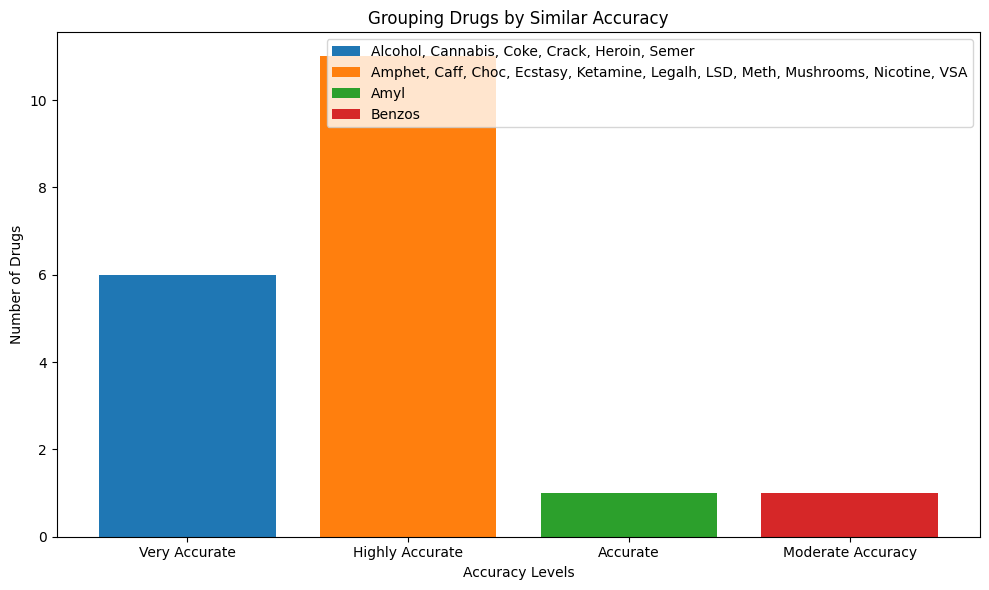

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary to store drug accuracies
drug_accuracy = {
    'Alcohol': 0.98,
    'Amphet': 0.99,
    'Amyl': 0.97,
    'Benzos': 0.92,
    'Caff': 0.99,
    'Cannabis': 0.98,
    'Choc': 0.99,
    'Coke': 0.98,
    'Crack': 0.98,
    'Ecstasy': 0.99,
    'Heroin': 0.98,
    'Ketamine': 0.99,
    'Legalh': 0.99,
    'LSD': 0.99,
    'Meth': 0.99,
    'Mushrooms': 0.99,
    'Nicotine': 0.99,
    'Semer': 0.98,
    'VSA': 0.99
}

# Define labels for accuracy levels
accuracy_labels = {
    1.0: 'Perfect Prediction',
    0.99: 'Highly Accurate',
    0.98: 'Very Accurate',
    0.97: 'Accurate',
    0.92: 'Moderate Accuracy'
}

# Group drugs by their accuracy
grouped_drugs = {}
for drug, accuracy in drug_accuracy.items():
    level = next((level for level, label in accuracy_labels.items() if accuracy >= level), None)
    if level:
        label = accuracy_labels[level]
        if label not in grouped_drugs:
            grouped_drugs[label] = [drug]
        else:
            grouped_drugs[label].append(drug)

# Create the bar chart
plt.figure(figsize=(10, 6))
for label, drugs in grouped_drugs.items():
    plt.bar(label, len(drugs), label=f'{", ".join(drugs)}')

plt.xlabel('Accuracy Levels')
plt.ylabel('Number of Drugs')
plt.title('Grouping Drugs by Similar Accuracy')

plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

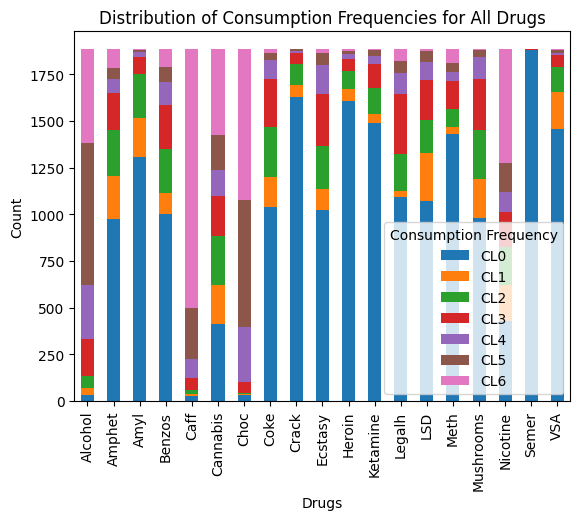

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('drug_consumption.csv')

# Define a list of drug names
drug_names = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
              'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# Create a bar chart to visualize the distribution of consumption frequencies for all drugs
consumption_counts = data[drug_names].apply(lambda x: x.value_counts())
consumption_counts = consumption_counts.transpose()  # Transpose the DataFrame for plotting

plt.figure(figsize=(12, 8))
consumption_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Consumption Frequencies for All Drugs')
plt.xlabel('Drugs')
plt.ylabel('Count')
plt.legend(title='Consumption Frequency')
plt.show()


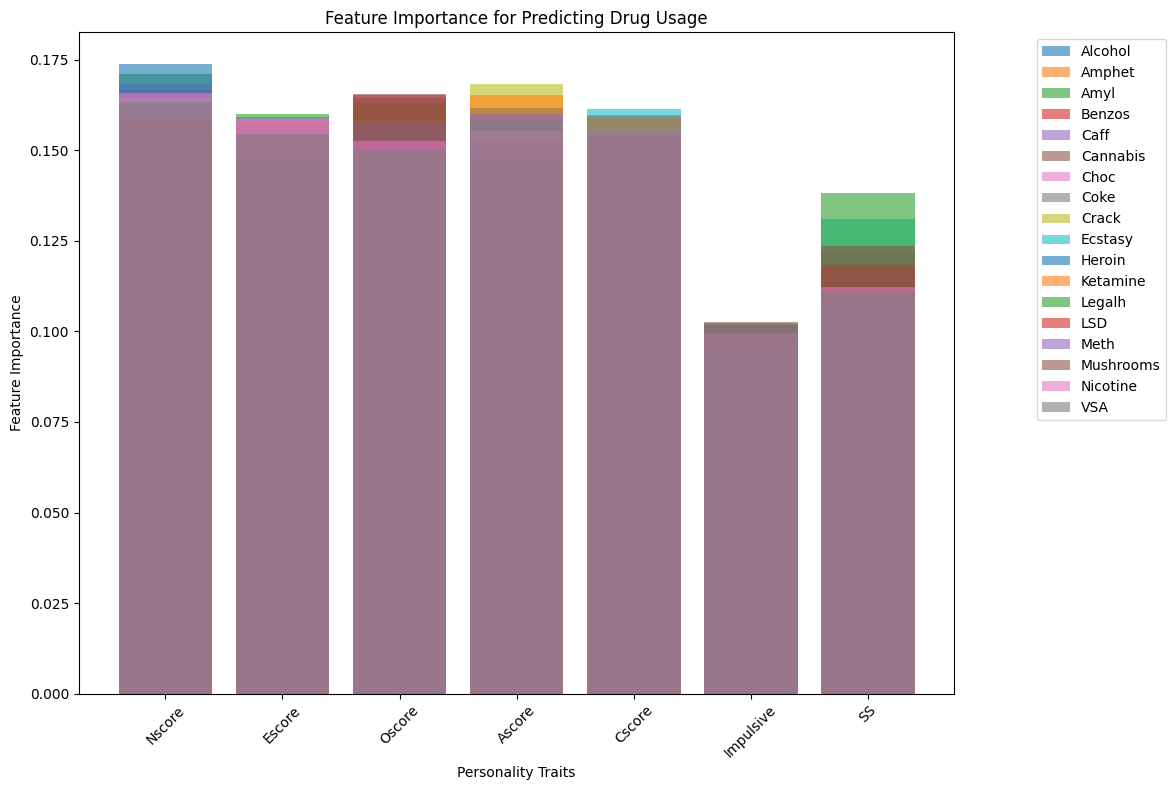

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Load your dataset (replace 'your_data.csv' with your dataset file)
data = pd.read_csv('drug_consumption.csv')

# List of drugs
drugs = [
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
    'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
    'Meth', 'Mushrooms', 'Nicotine',  'VSA'
]

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a figure for the multi-bar chart
plt.figure(figsize=(12, 8))

# Loop through each drug and plot feature importances
for drug in drugs:
    X = data[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]
    y = data[drug]
    rf_classifier.fit(X, y)
    feature_importances = rf_classifier.feature_importances_
    plt.bar(X.columns, feature_importances, alpha=0.6, label=drug)

# Customize the chart
plt.xlabel('Personality Traits')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Predicting Drug Usage')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()

# Show the multi-bar chart
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

# Load the dataset
data = pd.read_csv('drug_consumption.csv')

# Define the mapping for drug consumption frequency
frequency_mapping = {
    'CL0': 0,
    'CL1': 1,
    'CL2': 2,
    'CL3': 3,
    'CL4': 4,
    'CL5': 5,
    'CL6': 6
}

# Create a list of drug names
drug_names = [
    'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
    'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD',
    'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA'
]

# Prepare the input features (X) and target variables (Y)
X = data[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']].values
Y = data[drug_names].apply(lambda x: x.map(frequency_mapping)).values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a dictionary to store accuracy for each drug
drug_accuracy = {}

# Build and train a deep learning model for each drug
for i, drug_name in enumerate(drug_names):
    print(f"Training model for {drug_name}")

    # Build the model
    model = keras.Sequential([
        keras.layers.Input(shape=(7,)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(7, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, Y_train[:, i], epochs=50, verbose=0)

    # Evaluate the model on test data
    _, accuracy = model.evaluate(X_test, Y_test[:, i])

    drug_accuracy[drug_name] = accuracy

# Print the accuracy for each drug
for drug, accuracy in drug_accuracy.items():
    print(f"Accuracy for {drug}: {accuracy}")

# Store the drug accuracy in a file or use it as needed
# You can save the accuracy values to a file or use them for further analysis
# For example, you can save the dictionary to a JSON file for later reference.


Training model for Alcohol
12/12 [==============================] - 0s 3ms/step - loss: 1.6012 - accuracy: 0.3660
Training model for Amphet
12/12 [==============================] - 0s 2ms/step - loss: 1.4540 - accuracy: 0.4934
Training model for Amyl
12/12 [==============================] - 0s 2ms/step - loss: 1.0808 - accuracy: 0.6844
Training model for Benzos
12/12 [==============================] - 0s 2ms/step - loss: 1.5068 - accuracy: 0.5358
Training model for Caff
12/12 [==============================] - 0s 2ms/step - loss: 1.0355 - accuracy: 0.7215
Training model for Cannabis
12/12 [==============================] - 0s 2ms/step - loss: 1.7801 - accuracy: 0.3581
Training model for Choc
12/12 [==============================] - 0s 2ms/step - loss: 1.2433 - accuracy: 0.3899
Training model for Coke
12/12 [==============================] - 0s 2ms/step - loss: 1.2979 - accuracy: 0.5650
Training model for Crack
12/12 [==============================] - 0s 2ms/step - loss: 0.5480 - accura